In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

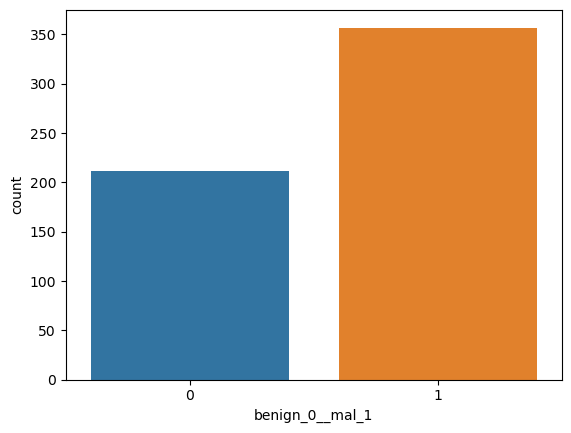

In [6]:
#for classification tasks, it is always a good idea to do a count plot on the label. 
#to see the number of observations for each category
sns.countplot(x=df['benign_0__mal_1'])

<Axes: >

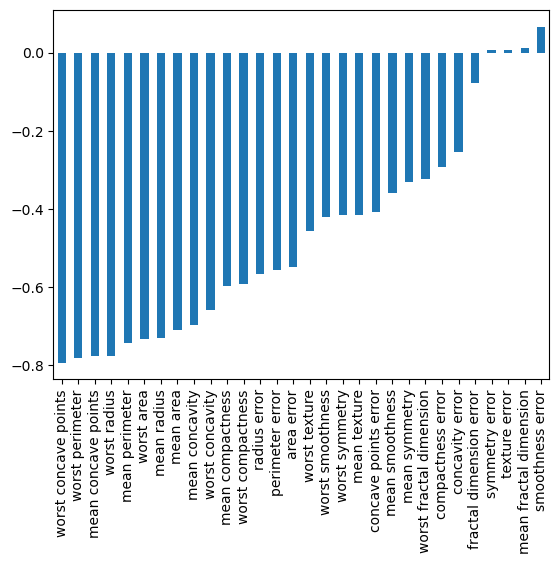

In [10]:
#check out correlations between the features
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

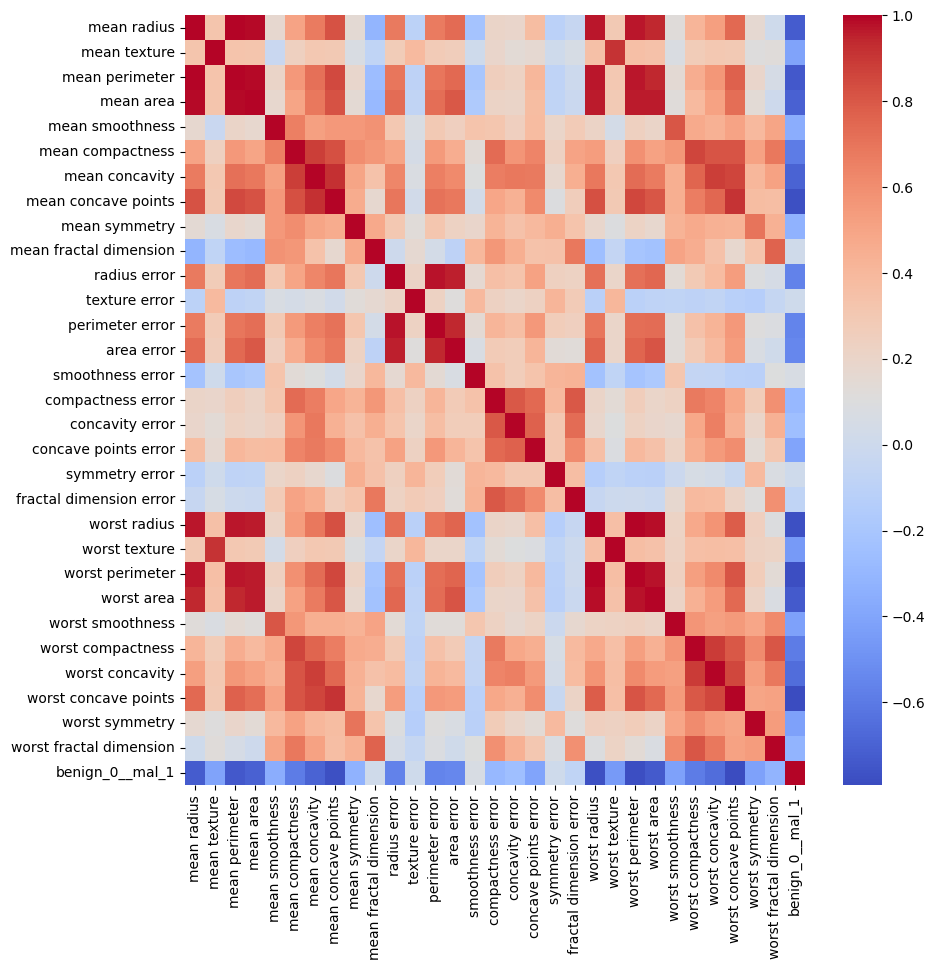

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [14]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


#Binary Classification
model.add(Dense(1,activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6698 - val_loss: 0.6520
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6303 - val_loss: 0.6138
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5908 - val_loss: 0.5702
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.5229
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5015 - val_loss: 0.4729
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4525 - val_loss: 0.4228
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4028 - val_loss: 0.3729
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3562 - val_loss: 0.3260
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3171 - val_loss: 0.2883
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.2982 - val_loss: 0.2616
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1185
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.1276
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1220
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1183
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.1184
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.1326
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0504 - val_loss: 0.1243
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1246
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0493 - val_loss: 0.1284
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.1212
Epoch 93/600


14/14 [==============================] - 0s 1ms/step - loss: 0.0411 - val_loss: 0.1353
Epoch 165/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.1437
Epoch 166/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.1380
Epoch 167/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.1531
Epoch 168/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.1334
Epoch 169/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0457 - val_loss: 0.1739
Epoch 170/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.1421
Epoch 171/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0406 - val_loss: 0.1620
Epoch 172/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0412 - val_loss: 0.1361
Epoch 173/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.1691
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0342 - val_loss: 0.1518
Epoch 246/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0336 - val_loss: 0.1620
Epoch 247/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0335 - val_loss: 0.1508
Epoch 248/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.1680
Epoch 249/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.1517
Epoch 250/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0340 - val_loss: 0.1709
Epoch 251/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.1662
Epoch 252/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.1637
Epoch 253/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0349 - val_loss: 0.1726
Epoch 254/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.1538
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0271 - val_loss: 0.1790
Epoch 327/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.1762
Epoch 328/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0279 - val_loss: 0.1698
Epoch 329/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.2128
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1576
Epoch 331/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0331 - val_loss: 0.2129
Epoch 332/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0362 - val_loss: 0.1754
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.1776
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.1714
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.1919
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.1958
Epoch 408/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0306 - val_loss: 0.1871
Epoch 409/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.2116
Epoch 410/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0219 - val_loss: 0.2102
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.2043
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0253 - val_loss: 0.1937
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.2155
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.2125
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.2027
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.2124
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.2126
Epoch 489/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.2612
Epoch 490/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.2168
Epoch 491/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.2792
Epoch 492/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.2114
Epoch 493/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.2595
Epoch 494/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.2283
Epoch 495/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.2402
Epoch 496/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.2416
Epoch 497/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.2179
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.3017
Epoch 570/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.2540
Epoch 571/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.3081
Epoch 572/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.2695
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.2432
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.2977
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.2663
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.2647
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.2714
Epoch 578/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.2771
Epoc

In [29]:
losses = pd.DataFrame(model.history.history)

<Axes: >

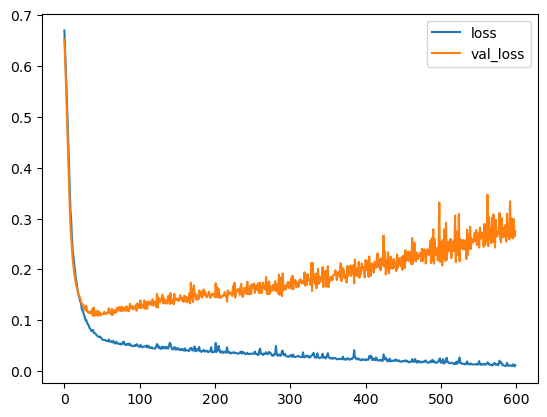

In [30]:
losses.plot()
#this plot is a classic example of overfitting

In [33]:
#based on validation loss, use keras's callbacks module Early Stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
#help(EarlyStopping)

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [38]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


#Binary Classification
model.add(Dense(1,activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6962 - val_loss: 0.6639
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6469 - val_loss: 0.6127
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5896 - val_loss: 0.5524
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5273 - val_loss: 0.4891
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4694 - val_loss: 0.4283
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4105 - val_loss: 0.3737
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3600 - val_loss: 0.3286
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3209 - val_loss: 0.2925
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.2911 - val_loss: 0.2633
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.2652 - val_loss: 0.2403
Epoch 11/

In [40]:
losses_es = pd.DataFrame(model.history.history)

<Axes: >

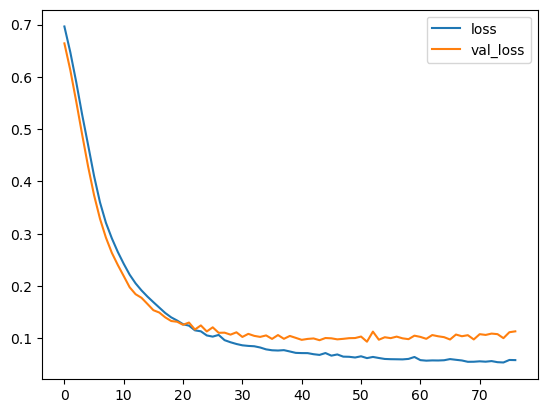

In [41]:
losses_es.plot()

In [42]:
#we can also add Dropout layers

In [43]:
model = Sequential()

model.add(Dense(30,activation='relu'))
#Common rate is between 0.2 to 0.5. Means that 50% of the neurons will be turned off randomly
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam')

In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6753 - val_loss: 0.6553
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6589 - val_loss: 0.6380
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6435 - val_loss: 0.6185
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6423 - val_loss: 0.5995
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6066 - val_loss: 0.5755
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5851 - val_loss: 0.5487
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5804 - val_loss: 0.5220
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5491 - val_loss: 0.4966
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5342 - val_loss: 0.4700
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5123 - val_loss: 0.4445
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.1074 - val_loss: 0.0870
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.0949
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1059 - val_loss: 0.0886
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1156 - val_loss: 0.0923
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1113 - val_loss: 0.0872
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0911 - val_loss: 0.0899
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0994 - val_loss: 0.0915
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1033 - val_loss: 0.0942
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0890 - val_loss: 0.0861
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1072 - val_loss: 0.0938
Epoch 93/600


In [45]:
losses_dropout_es = pd.DataFrame(model.history.history)

<Axes: >

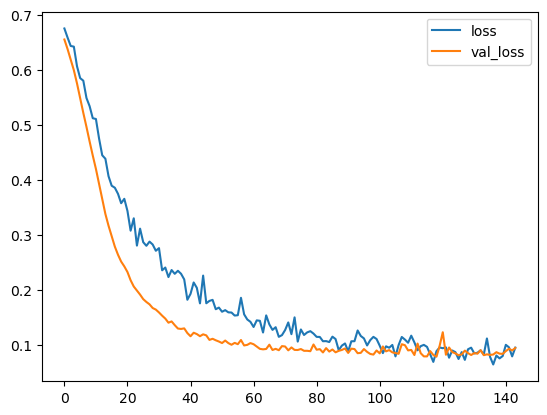

In [46]:
losses_dropout_es.plot()

In [55]:
prediction_class = (model.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 914us/step


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [58]:
print(confusion_matrix(y_test,prediction_class))

[[54  1]
 [ 3 85]]
